## Using features extracted from intensity profiles


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Colab Notebooks/plaque analysis
import os
HOME = os.getcwd()
print(HOME)
#!ls

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/plaque analysis
/content/drive/MyDrive/Colab Notebooks/plaque analysis


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from cycler import cycler
from openpyxl import load_workbook
from matplotlib.offsetbox import AnchoredText
import matplotlib.ticker as ticker
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import time
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
import matplotlib.pylab as pylab
params = {'font.size': 10,
          'legend.fontsize': 'x-large',
          'figure.titlesize': 'x-large',
          #'figure.figsize': (5, 6),
          'axes.grid' : False,
          'figure.titlesize':'x-large',
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'}
pylab.rcParams.update(params)

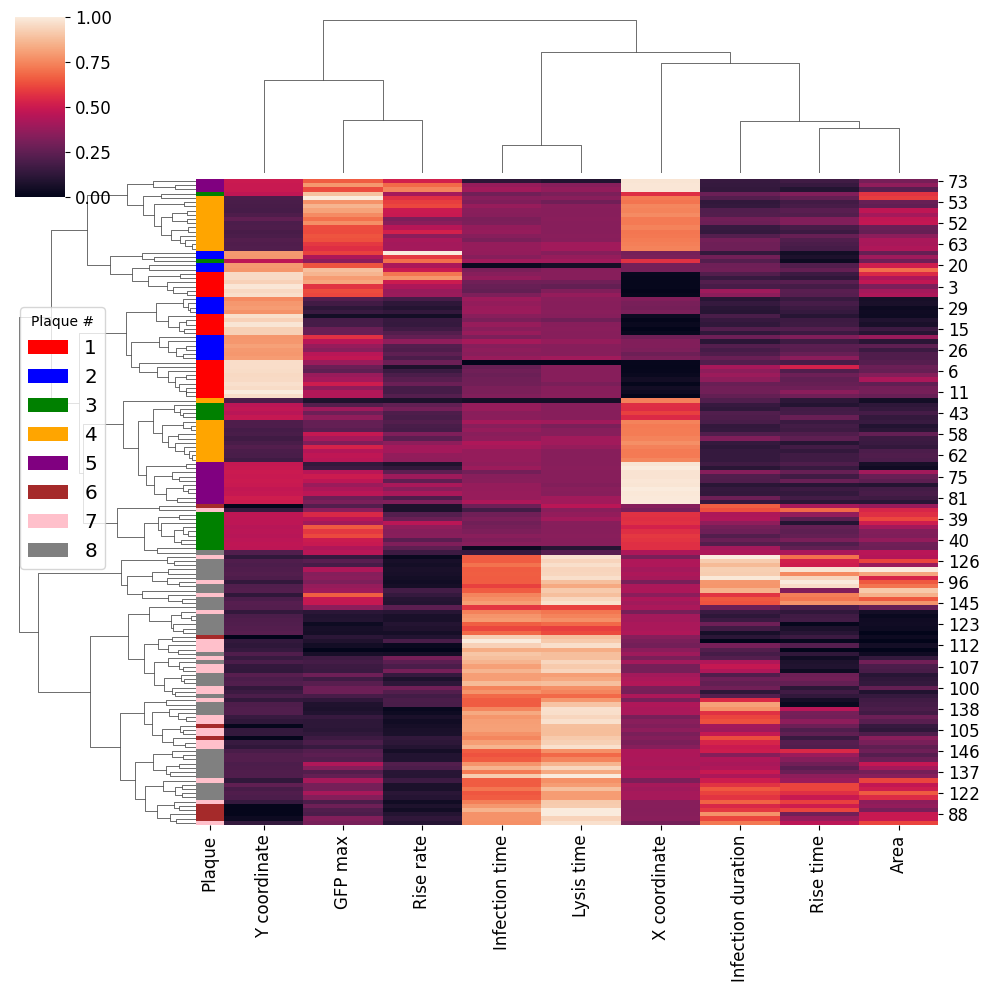

In [ ]:
file_name = 'all plaques attributes-corrected.xlsx'
sheet_name = 'all plaques with xy'
results_df = pd.read_excel(file_name, sheet_name, nrows=153)
results_df_plot = results_df.drop(labels=['Unnamed: 0', 'Cell #', 'Cell ID','Plaque'], axis=1)

scaled_data_plot = MinMaxScaler().fit_transform(results_df_plot)
scaled_data_plot = pd.DataFrame({'GFP max': scaled_data_plot[:,0],
                                 'Infection time': scaled_data_plot[:,1],
                                 'Rise time': scaled_data_plot[:,2],
                                 'Lysis time': scaled_data_plot[:,3],
                                 'Infection duration': scaled_data_plot[:,4],
                                 'Rise rate': scaled_data_plot[:,5],
                                 'Area': scaled_data_plot[:,6],
                                 'X coordinate' : scaled_data_plot[:,7],
                                 'Y coordinate' : scaled_data_plot[:,8]
                                 })

plaque_color_map = {
    1: 'red',
    2: 'blue',
    3: 'green',
    4: 'orange',
    5: 'purple',
    6: 'brown',
    7: 'pink',
    8: 'gray',
#    9: 'olive'
}

#sns.clustermap(results_df_plot, standard_scale=1, method='complete', metric='euclidean', row_colors=results_df.Plaque.map(plaque_color_map));
sns.clustermap(scaled_data_plot, method='complete', metric='euclidean', row_colors=results_df.Plaque.map(plaque_color_map), figsize=(10,10),
               row_cluster=True,
               col_cluster=True);

from matplotlib.patches import Patch

handles = [Patch(facecolor=plaque_color_map[name]) for name in plaque_color_map]
plt.legend(handles, plaque_color_map, title='Plaque #',
           bbox_to_anchor=(0.12, 0.7), bbox_transform=plt.gcf().transFigure, loc='upper right')

#https://www.youtube.com/watch?v=MGQW2prLLl0



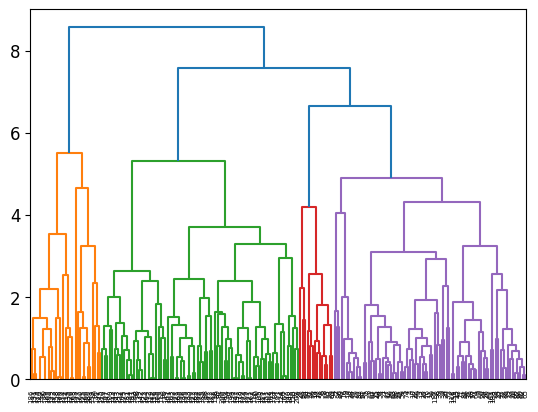

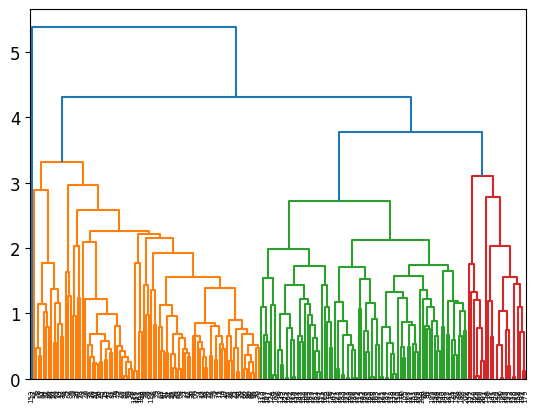

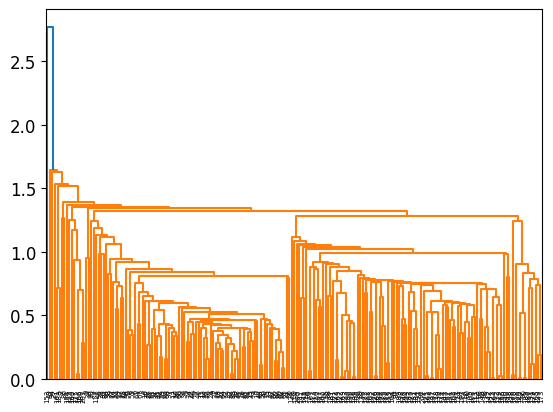

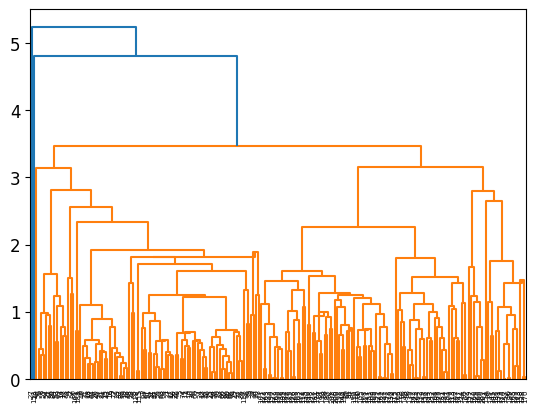

In [ ]:

file_name = 'all plaques attributes-corrected.xlsx'
sheet_name = 'all plaques wo xy'
results_df = pd.read_excel(file_name, sheet_name)#, nrows=153)
results_df = results_df.drop(labels=['Unnamed: 0', 'Cell #', 'Plaque', 'Cell ID'], axis=1)

scaled_data = StandardScaler().fit_transform(results_df)

complete_clustering = linkage(scaled_data, method="complete", metric="euclidean")
average_clustering = linkage(scaled_data, method="average", metric="euclidean")
single_clustering = linkage(scaled_data, method="single", metric="euclidean")
centroid_clustering = linkage(scaled_data, method="centroid", metric="euclidean")

dendrogram(complete_clustering)
plt.show()

dendrogram(average_clustering)
plt.show()

dendrogram(single_clustering)
plt.show()

dendrogram(centroid_clustering)
plt.show()